### Package Importing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print('import')

import


### Read CSV Files

In [2]:
path = r"C:\Users\saran\Desktop\Amazon India\Amazon Clean Data.csv"
df = pd.read_csv(path)


In [3]:
df.columns

Index(['Transaction Id', 'Order Date', 'Customer Id', 'Product Id',
       'Product Name', 'Category', 'Subcategory', 'Brand',
       'Original Price Inr', 'Discount Percent', 'Discounted Price Inr',
       'Quantity', 'Subtotal Inr', 'Delivery Charges', 'Final Amount Inr',
       'Customer City', 'Customer State', 'Customer Tier',
       'Customer Spending Tier', 'Customer Age Group', 'Payment Method',
       'Delivery Days', 'Delivery Type', 'Is Prime Member', 'Is Festival Sale',
       'Festival Name', 'Customer Rating', 'Return Status', 'Order Month',
       'Order Year', 'Order Quarter', 'Product Weight Kg', 'Is Prime Eligible',
       'Product Rating'],
      dtype='object')

In [8]:
df['Delivery Charges'].value_counts()

Delivery Charges
0.0     1127601
40.0          8
Name: count, dtype: int64

C:\Users\saran\AppData\Local\Temp\ipykernel_20004\2235754965.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( data=delivery_charge, x='Customer State', y='Delivery Charges', hue='Customer Tier', palette='Set2', ci=None)


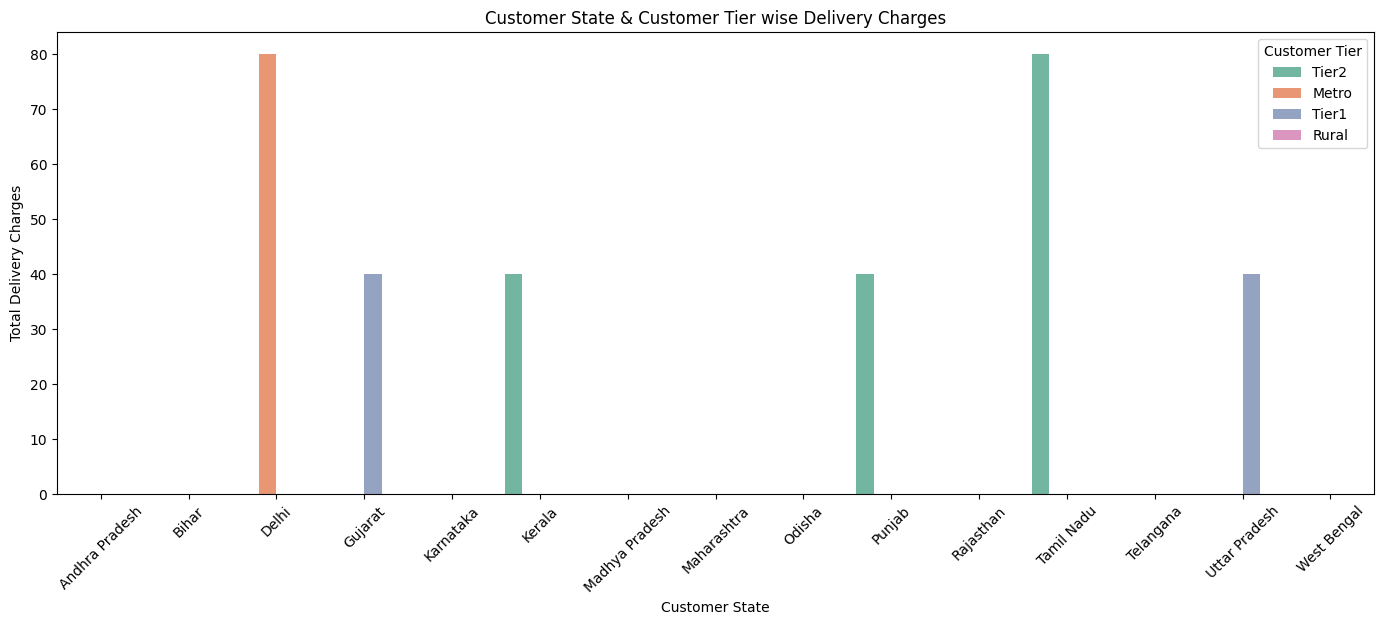

In [6]:
delivery_charge = df.groupby(['Customer State', 'Customer Tier'])['Delivery Charges'].sum().reset_index()
plt.figure(figsize=(17,6))
sns.barplot( data=delivery_charge, x='Customer State', y='Delivery Charges', hue='Customer Tier', palette='Set2', ci=None)
plt.title("Customer State & Customer Tier wise Delivery Charges")
plt.ylabel('Total Delivery Charges')
plt.xlabel('Customer State')
plt.xticks(rotation=45)
plt.show()



Question 1

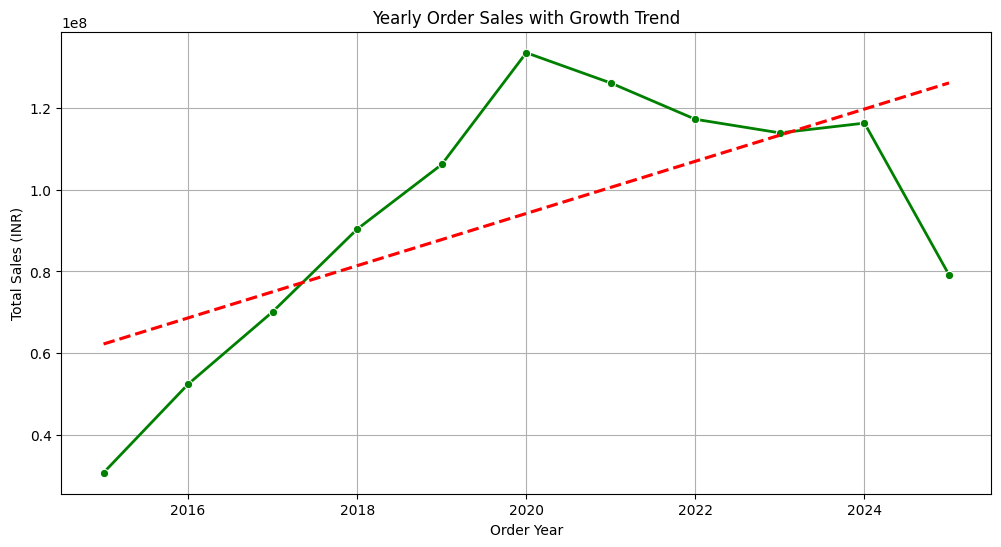

In [9]:
yearly_sales = df.groupby('Order Year')['Final Amount Inr'].sum().reset_index()
yearly_sales['Growth %'] = yearly_sales['Final Amount Inr'].pct_change() * 100
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x='Order Year', y='Final Amount Inr', marker='o', linewidth=2, color='green')
sns.regplot(data=yearly_sales, x='Order Year', y='Final Amount Inr', scatter=False, ci=None, color='red', line_kws={"linestyle":"--"})
plt.title("Yearly Order Sales with Growth Trend")
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.grid(True)
plt.show()


Question 2

C:\Users\saran\AppData\Local\Temp\ipykernel_20004\3932582725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sum_final, x='Order Month', y='Final Amount Inr', palette='Set3')


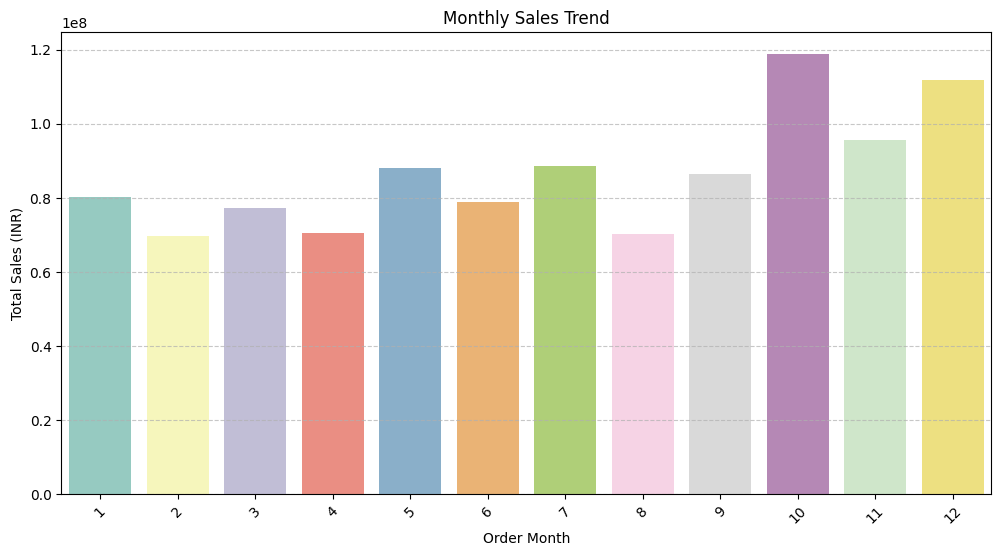

In [11]:
sum_final = df.groupby('Order Month', as_index=False)['Final Amount Inr'].sum()
plt.figure(figsize=(12,6))
sns.barplot(data=sum_final, x='Order Month', y='Final Amount Inr', palette='Set3')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (INR)")
plt.xlabel("Order Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


Question 3

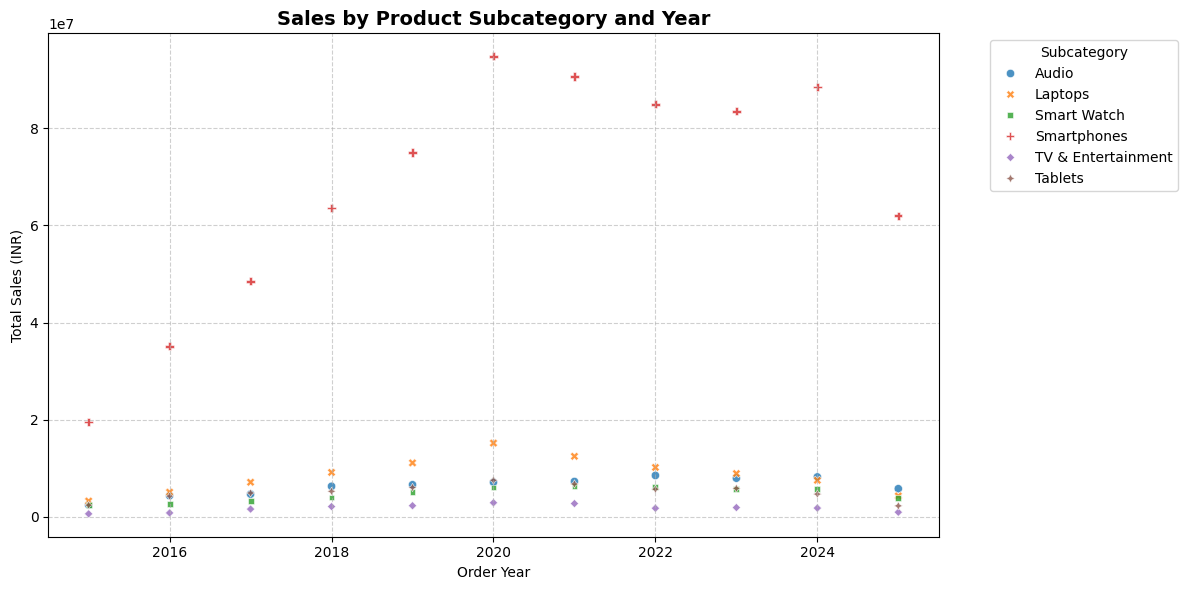

In [ ]:
group_by = df.groupby(['Order Year', 'Subcategory'])['Final Amount Inr'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(data=group_by, x='Order Year', y='Final Amount Inr', hue='Subcategory', style='Subcategory', alpha=0.8 )
plt.title("Sales by Product Subcategory and Year", fontsize=14, fontweight='bold')
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 4

C:\Users\saran\AppData\Local\Temp\ipykernel_20004\2493896269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment Method', palette='Set2')


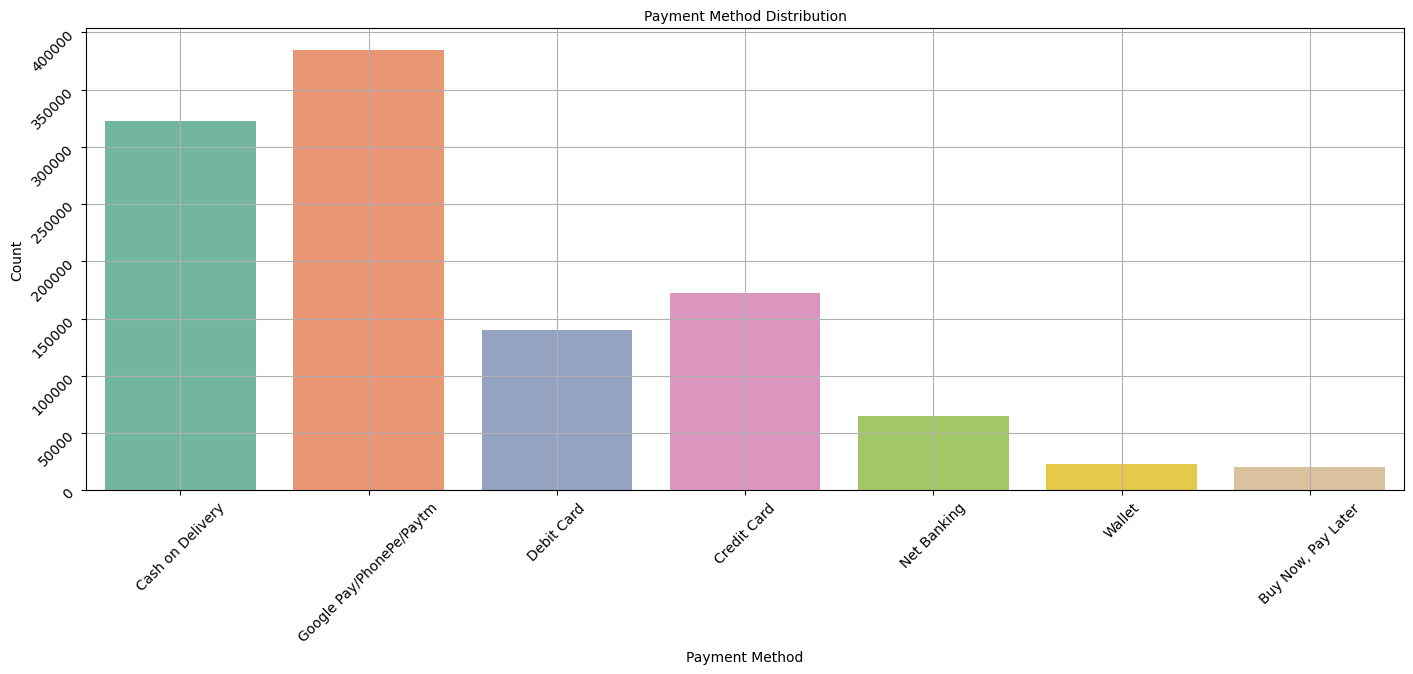

In [17]:
plt.figure(figsize=(17,6))
sns.countplot(data=df, x='Payment Method', palette='Set2')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=45, fontsize=10)
plt.xlabel("Payment Method", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Payment Method Distribution", fontsize=10)
plt.grid()
plt.show()


Question 4

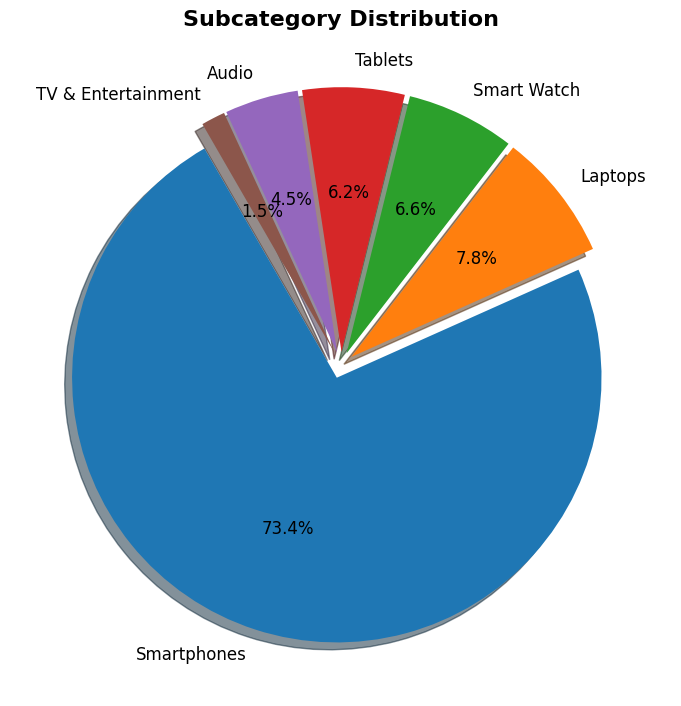

In [20]:
brand = df['Subcategory'].value_counts()
plt.figure(figsize=(7,8))
plt.pie(brand,labels=brand.index,autopct="%1.1f%%",   startangle=120, shadow=True, explode=[0.05]*len(brand), textprops={'fontsize': 12} )
plt.title("Subcategory Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Question 6

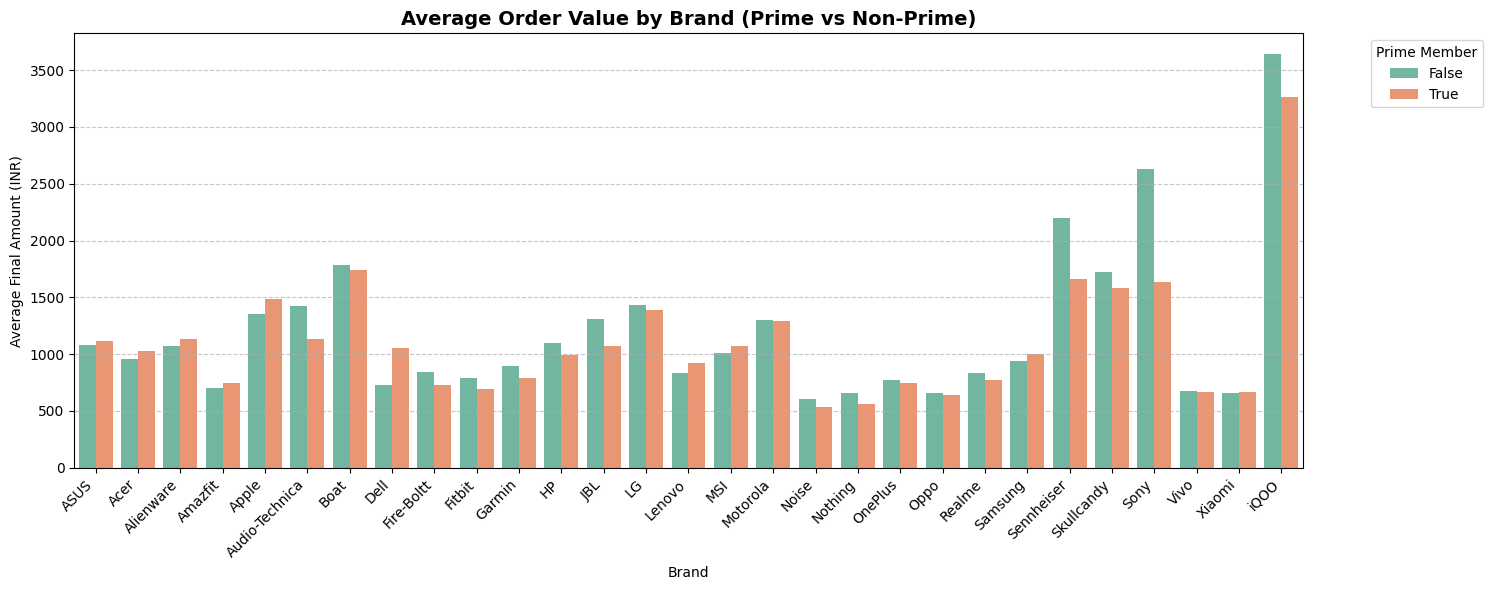

In [ ]:
prime_member = df.groupby(['Brand', 'Is Prime Member'])['Final Amount Inr'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=prime_member,x='Brand',y='Final Amount Inr',hue='Is Prime Member',palette='Set2')
plt.title("Average Order Value by Brand (Prime vs Non-Prime)", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Average Final Amount (INR)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Prime Member", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 7

C:\Users\saran\AppData\Local\Temp\ipykernel_20004\1037622189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Customer State',palette='Set1',order=df['Customer State'].value_counts().index )


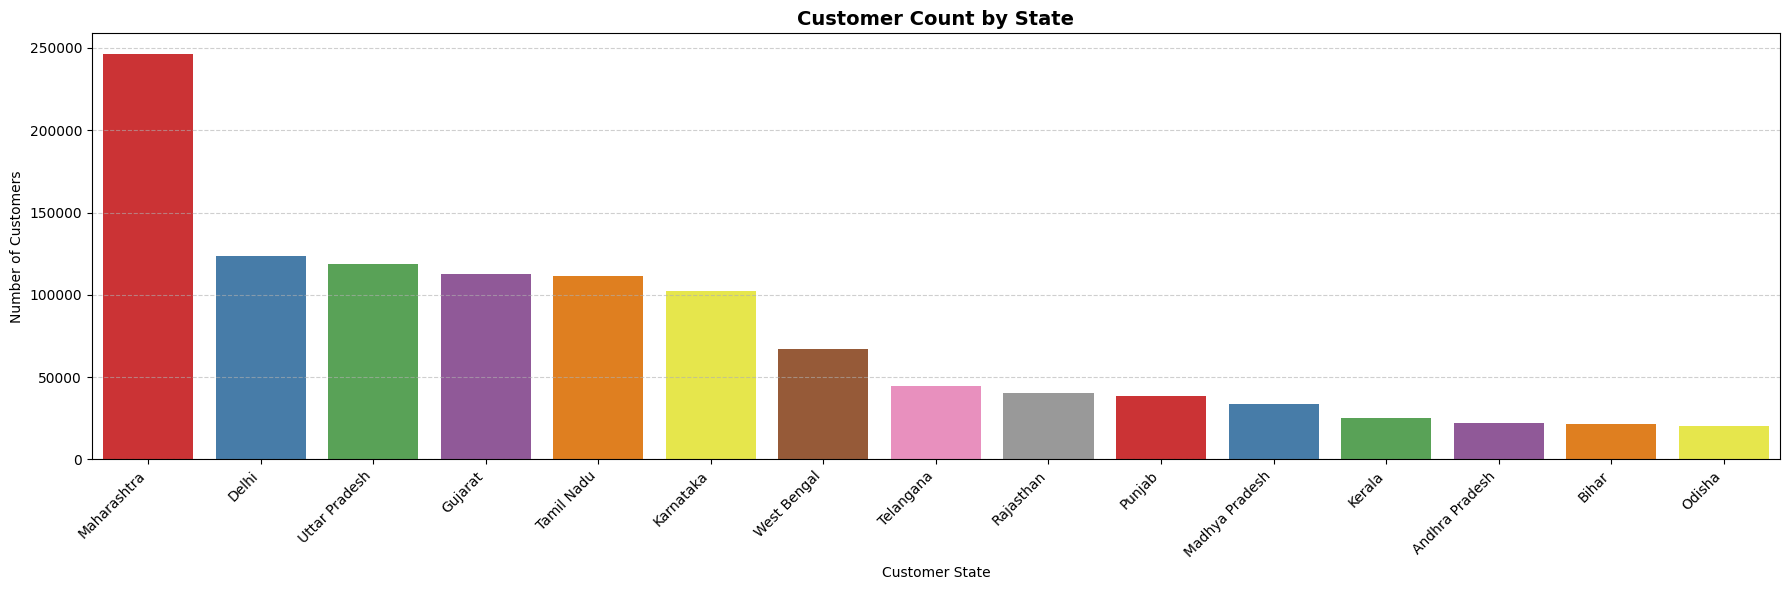

In [33]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='Customer State',palette='Set1',order=df['Customer State'].value_counts().index )
plt.ylabel("Number of Customers")
plt.xlabel("Customer State")
plt.title("Customer Count by State", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Question 8

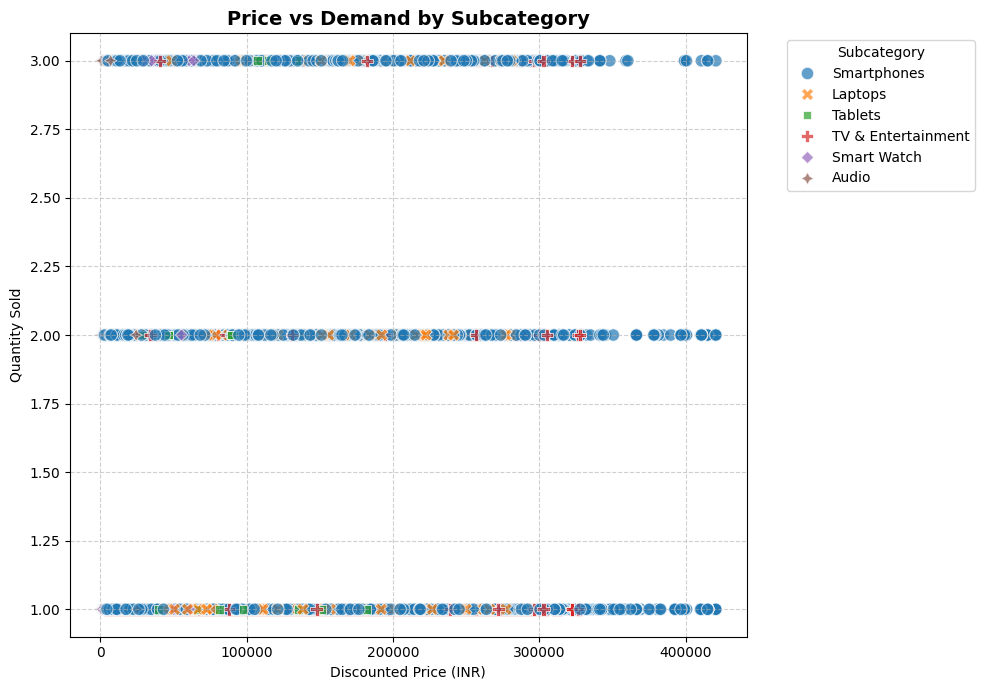

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Discounted Price Inr',y='Quantity',hue='Subcategory',style='Subcategory', alpha=0.7, s=80 )
plt.title("Price vs Demand by Subcategory", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Quantity Sold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 9

C:\Users\saran\AppData\Local\Temp\ipykernel_20004\2556951797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


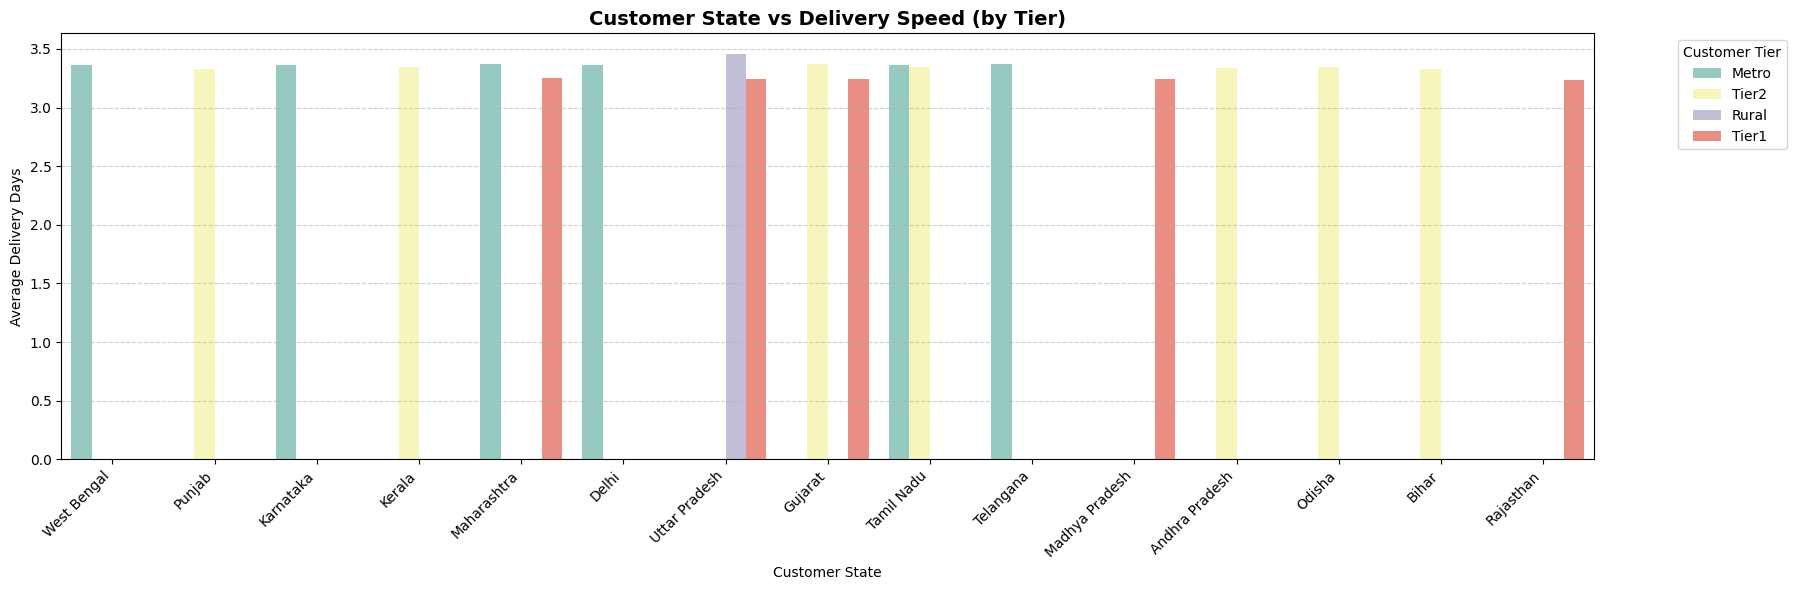

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Customer State',y='Delivery Days',hue='Customer Tier',ci=None,palette='Set3')
plt.title("Customer State vs Delivery Speed (by Tier)", fontsize=14, fontweight='bold')
plt.xlabel("Customer State")
plt.ylabel("Average Delivery Days")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.legend(title="Customer Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 10

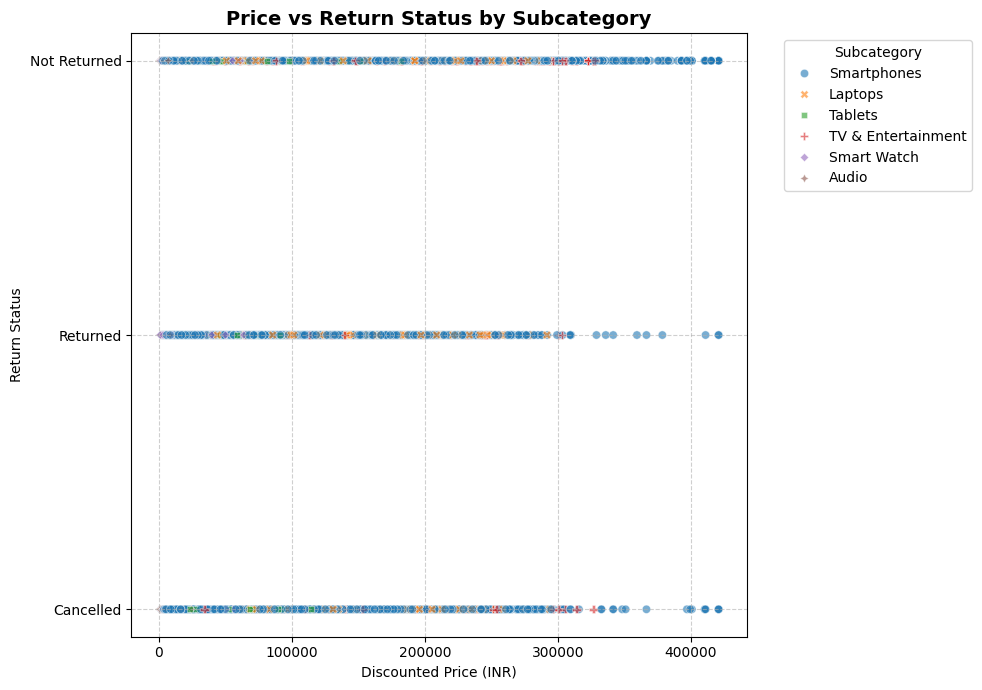

In [4]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Discounted Price Inr', y='Return Status', hue='Subcategory', alpha=0.6, style='Subcategory')
plt.yticks([0,1,2], ["Not Returned", "Returned", "Cancelled"])
plt.title("Price vs Return Status by Subcategory", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Return Status")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 11

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\1773770552.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)
C:\Users\saran\AppData\Local\Temp\ipykernel_12504\1773770552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)


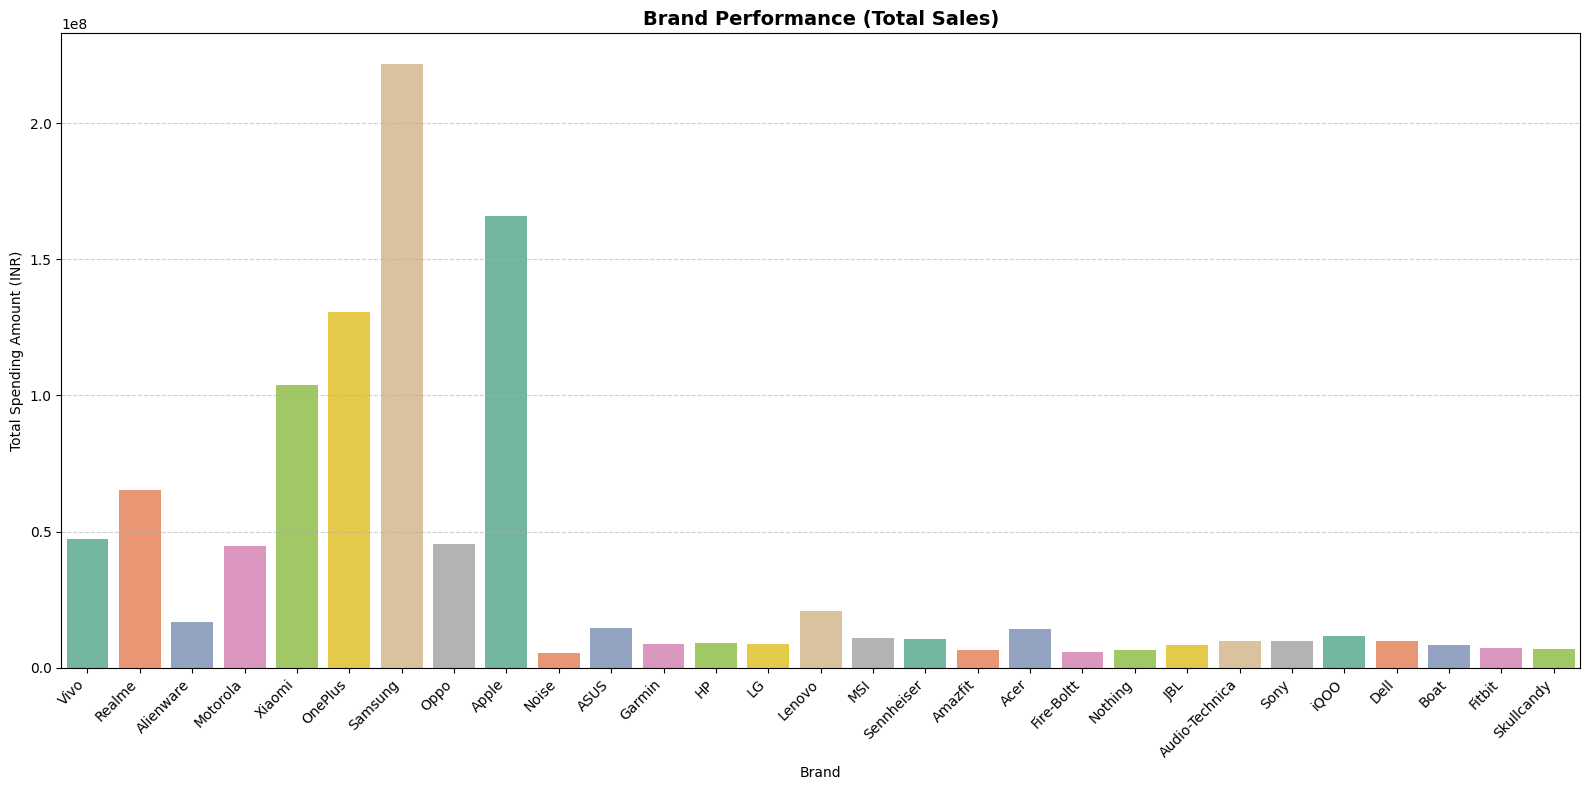

In [5]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Total Spending Amount (INR)")
plt.title("Brand Performance (Total Sales)", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Question 12

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\4116782616.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2', estimator=sum, ci=None)


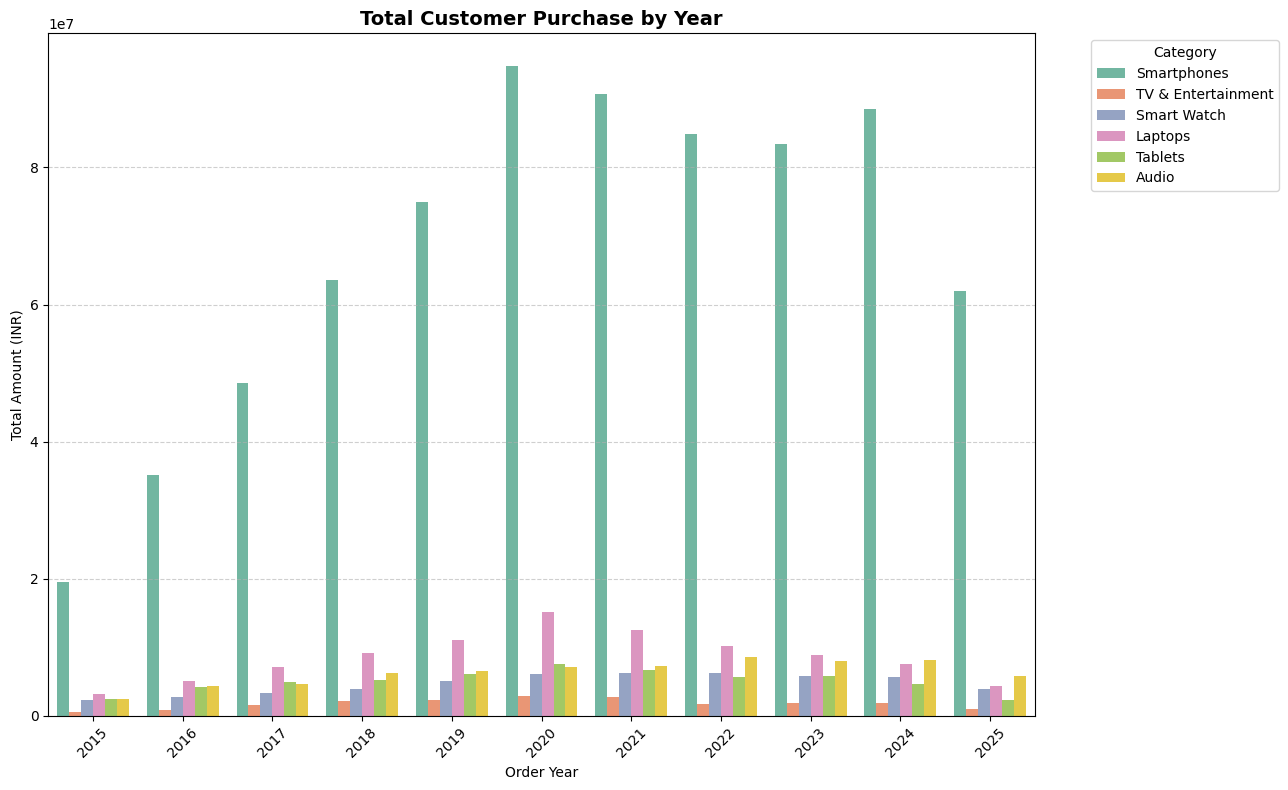

In [8]:
plt.figure(figsize=(13,8))
sns.barplot(data=df, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2', estimator=sum, ci=None)
plt.title('Total Customer Purchase by Year', fontsize=14, fontweight="bold")
plt.ylabel('Total Amount (INR)')
plt.xlabel('Order Year')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 13



C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


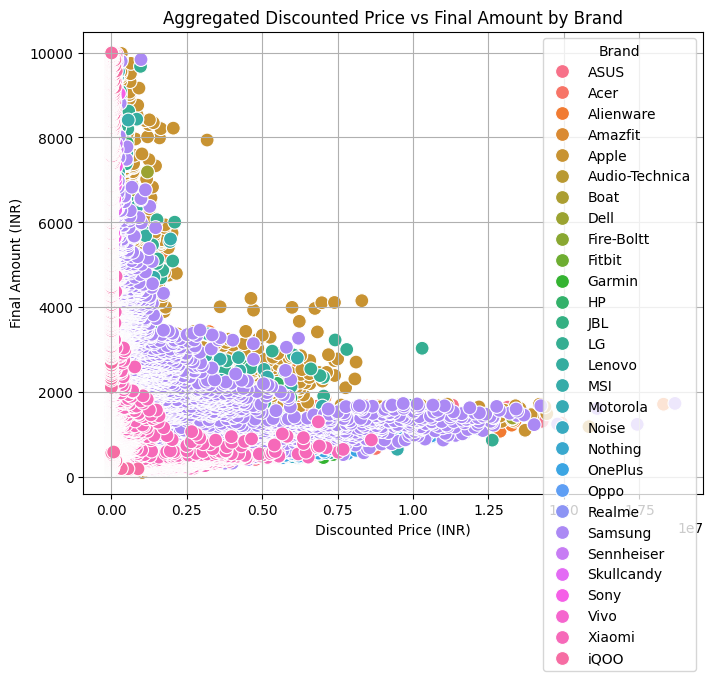

In [30]:
sales_discount = df.groupby(['Brand', 'Final Amount Inr'], as_index=False)['Discounted Price Inr'].sum()

plt.figure(figsize=(8,6))
sns.scatterplot(data=sales_discount, x='Discounted Price Inr', y='Final Amount Inr', hue='Brand', s=100)
plt.title('Aggregated Discounted Price vs Final Amount by Brand')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Final Amount (INR)')
plt.grid(True)
plt.show()


Question 14

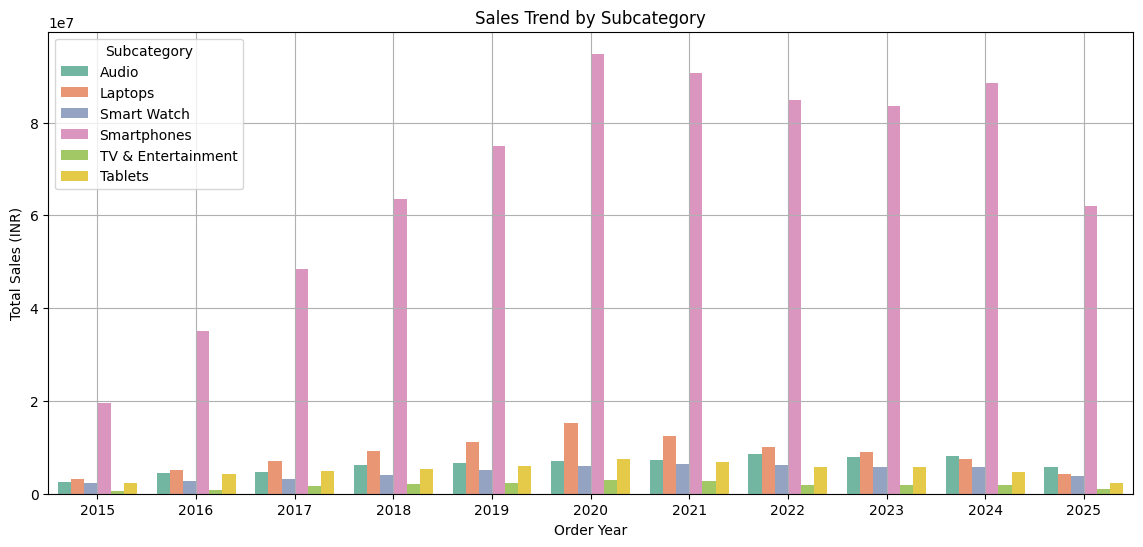

In [65]:
year_sales = df.groupby(['Order Year', 'Subcategory'])['Final Amount Inr'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=year_sales, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2')
plt.title('Sales Trend by Subcategory')
plt.xlabel('Order Year')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()

Question 15

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\513753773.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', palette='Set2', ci=None, estimator='mean')
C:\Users\saran\AppData\Local\Temp\ipykernel_12504\513753773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', palette='Set2', ci=None, estimator='mean')


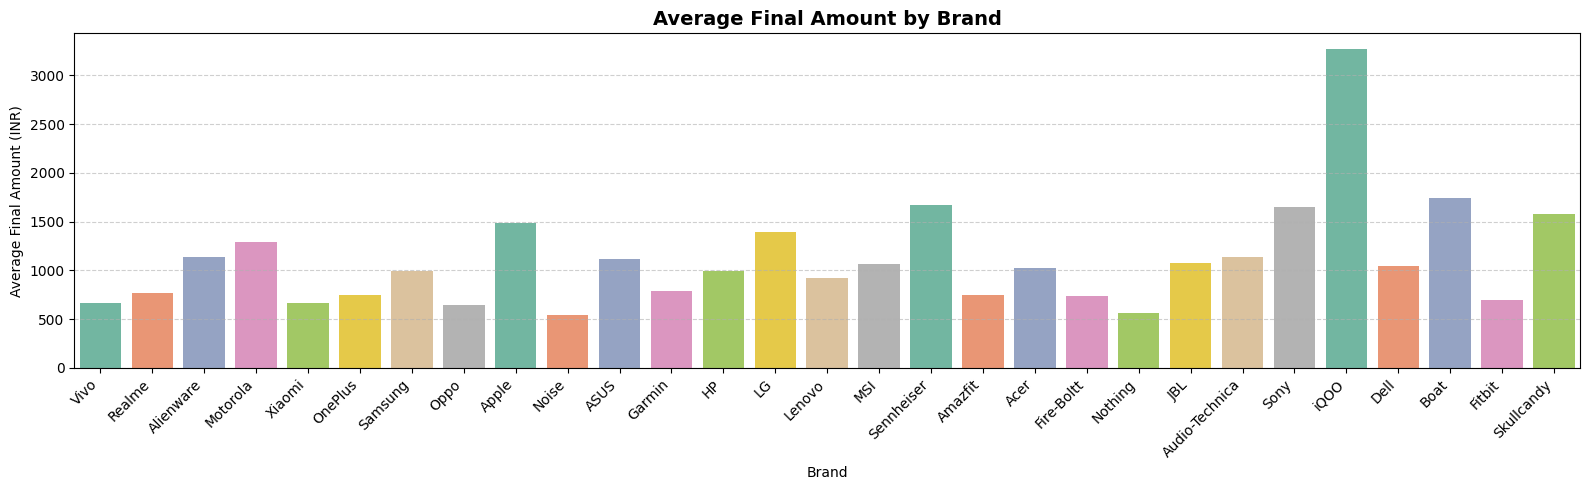

In [12]:
plt.figure(figsize=(16,5))
sns.barplot(data=df, x='Brand', y='Final Amount Inr', palette='Set2', ci=None, estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title("Average Final Amount by Brand", fontsize=14, fontweight="bold")
plt.ylabel("Average Final Amount (INR)")
plt.xlabel("Brand")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Question 16

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\2434828572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_customers, x='Customer Age Group', y='Final Amount Inr', palette='Set2')


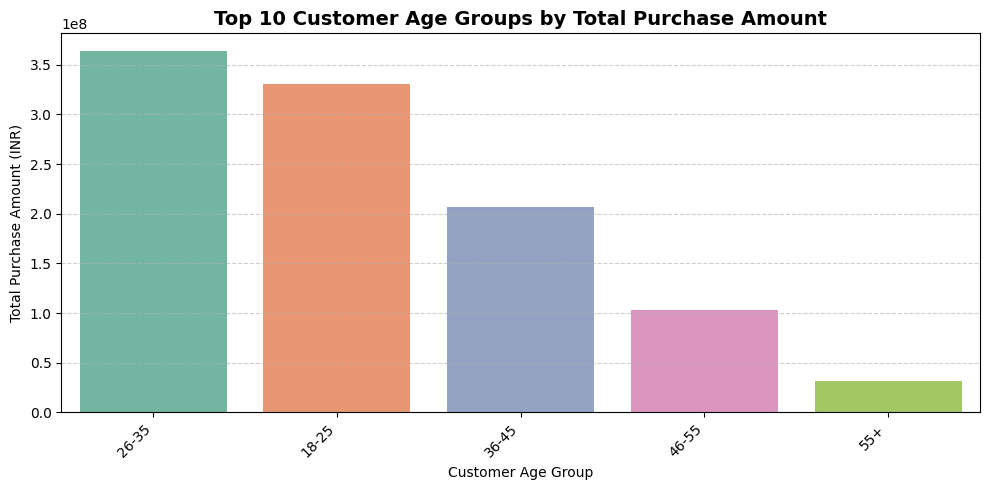

In [13]:
age_customers = df.groupby('Customer Age Group', as_index=False)['Final Amount Inr'].sum().sort_values(by='Final Amount Inr', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=age_customers, x='Customer Age Group', y='Final Amount Inr', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Customer Age Groups by Total Purchase Amount", fontsize=14, fontweight="bold")
plt.xlabel("Customer Age Group")
plt.ylabel("Total Purchase Amount (INR)")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Question 17

In [ ]:
month_map_full = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Order Month'] = df['Order Month'].replace(month_map_full)


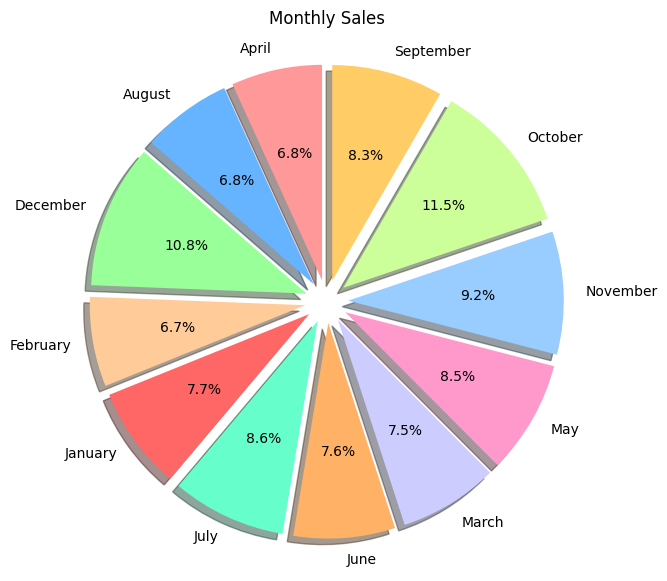

In [ ]:
plt.figure(figsize=(10,7))
colors = ['#FF9999',   '#66B3FF',   '#99FF99',   '#FFCC99',   '#FF6666',  '#66FFCC',   '#FFB266',   '#CCCCFF',   '#FF99CC',   '#99CCFF',   '#CCFF99',   '#FFCC66'   ]
monthly_order = df.groupby('Order Month')['Final Amount Inr'].sum().reset_index()
plt.pie(monthly_order['Final Amount Inr'], labels=monthly_order['Order Month'], colors= colors,startangle=90, autopct="%1.1f%%" ,explode= [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.title('Monthly Sales')
plt.show()

Question 18

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\3142439226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', hue='Order Quarter', palette='Set2', ci=None, estimator='sum')


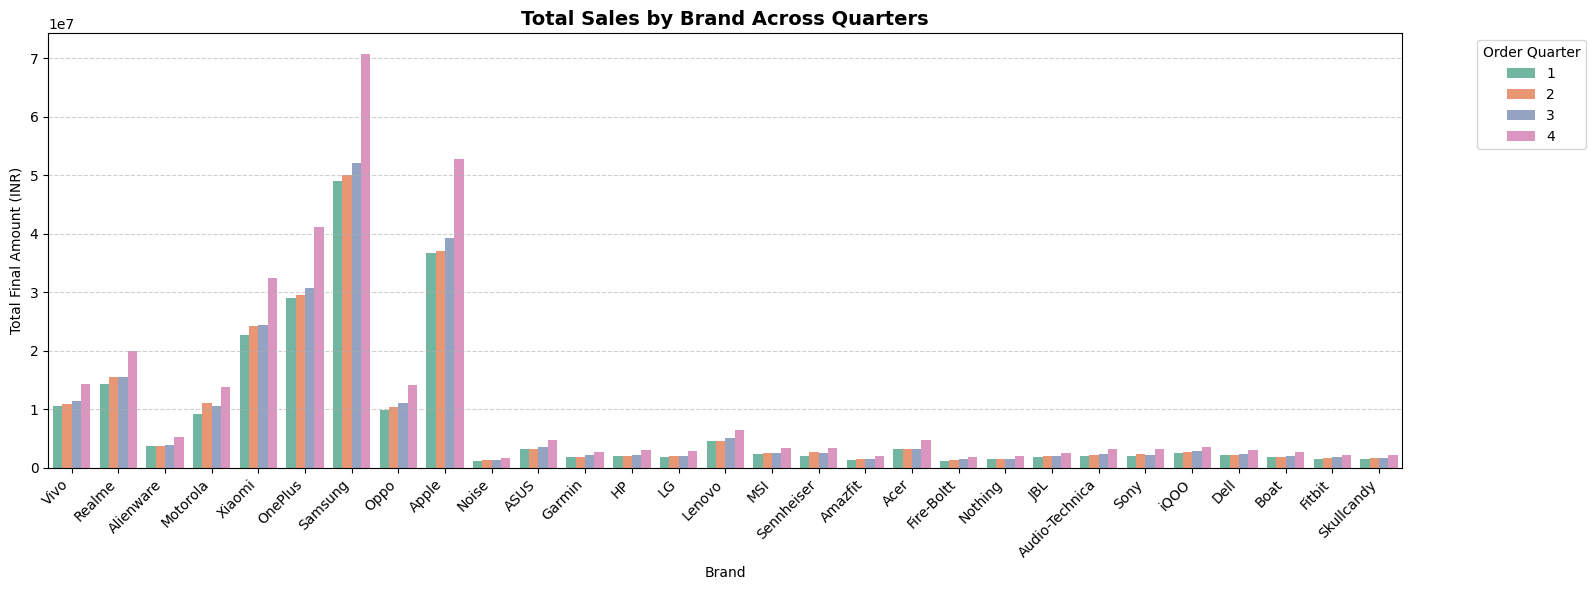

In [16]:
plt.figure(figsize=(16,6))
sns.barplot(data=df, x='Brand', y='Final Amount Inr', hue='Order Quarter', palette='Set2', ci=None, estimator='sum')
plt.xticks(rotation=45, ha='right')
plt.title("Total Sales by Brand Across Quarters", fontsize=14, fontweight="bold")
plt.xlabel("Brand")
plt.ylabel("Total Final Amount (INR)")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.legend(title="Order Quarter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question 19

In [6]:
df.columns

Index(['Transaction Id', 'Order Date', 'Customer Id', 'Product Id',
       'Product Name', 'Category', 'Subcategory', 'Brand',
       'Original Price Inr', 'Discount Percent', 'Discounted Price Inr',
       'Quantity', 'Subtotal Inr', 'Delivery Charges', 'Final Amount Inr',
       'Customer City', 'Customer State', 'Customer Tier',
       'Customer Spending Tier', 'Customer Age Group', 'Payment Method',
       'Delivery Days', 'Delivery Type', 'Is Prime Member', 'Is Festival Sale',
       'Festival Name', 'Customer Rating', 'Return Status', 'Order Month',
       'Order Year', 'Order Quarter', 'Product Weight Kg', 'Is Prime Eligible',
       'Product Rating'],
      dtype='object')

Question 20

C:\Users\saran\AppData\Local\Temp\ipykernel_12504\4044001194.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=year_totals, x='Order Quarter', y='Final Amount Inr', hue='Order Year', palette='Set2', ci=None)


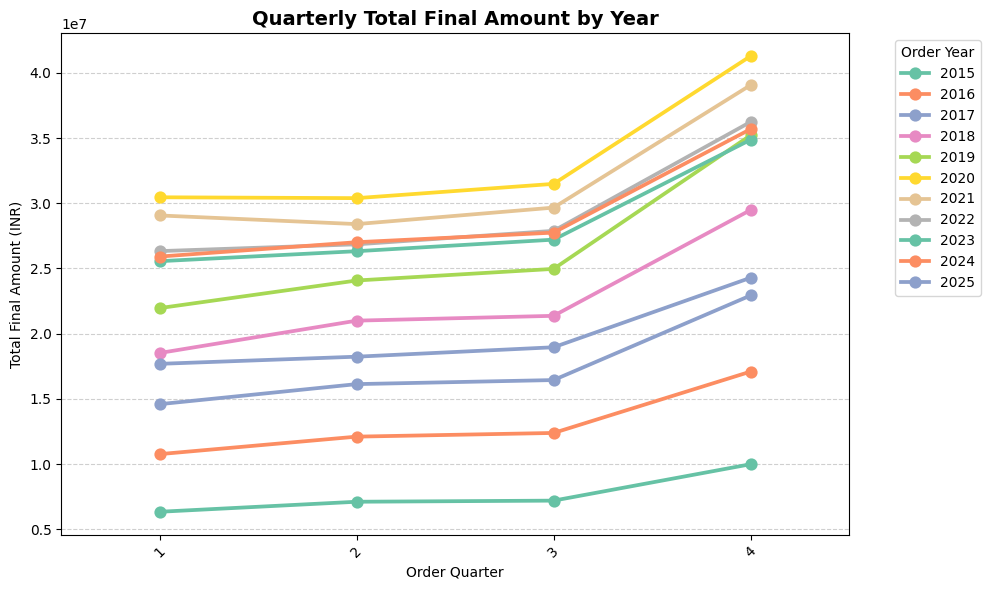

In [21]:
plt.figure(figsize=(10,6))
year_totals = df.groupby(['Order Quarter', 'Order Year'])['Final Amount Inr'].sum().reset_index()
sns.pointplot(data=year_totals, x='Order Quarter', y='Final Amount Inr', hue='Order Year', palette='Set2', ci=None)
plt.title("Quarterly Total Final Amount by Year", fontsize=14, fontweight='bold')
plt.xlabel("Order Quarter")
plt.ylabel("Total Final Amount (INR)")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title="Order Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


Question 21

C:\Users\saran\AppData\Local\Temp\ipykernel_1364\1692687975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer State', ax=axes[0], palette="Set2")
C:\Users\saran\AppData\Local\Temp\ipykernel_1364\1692687975.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer City', ax=axes[1], palette="Set3")
C:\Users\saran\AppData\Local\Temp\ipykernel_1364\1692687975.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer Tier', ax=axes[2], palette="pastel")


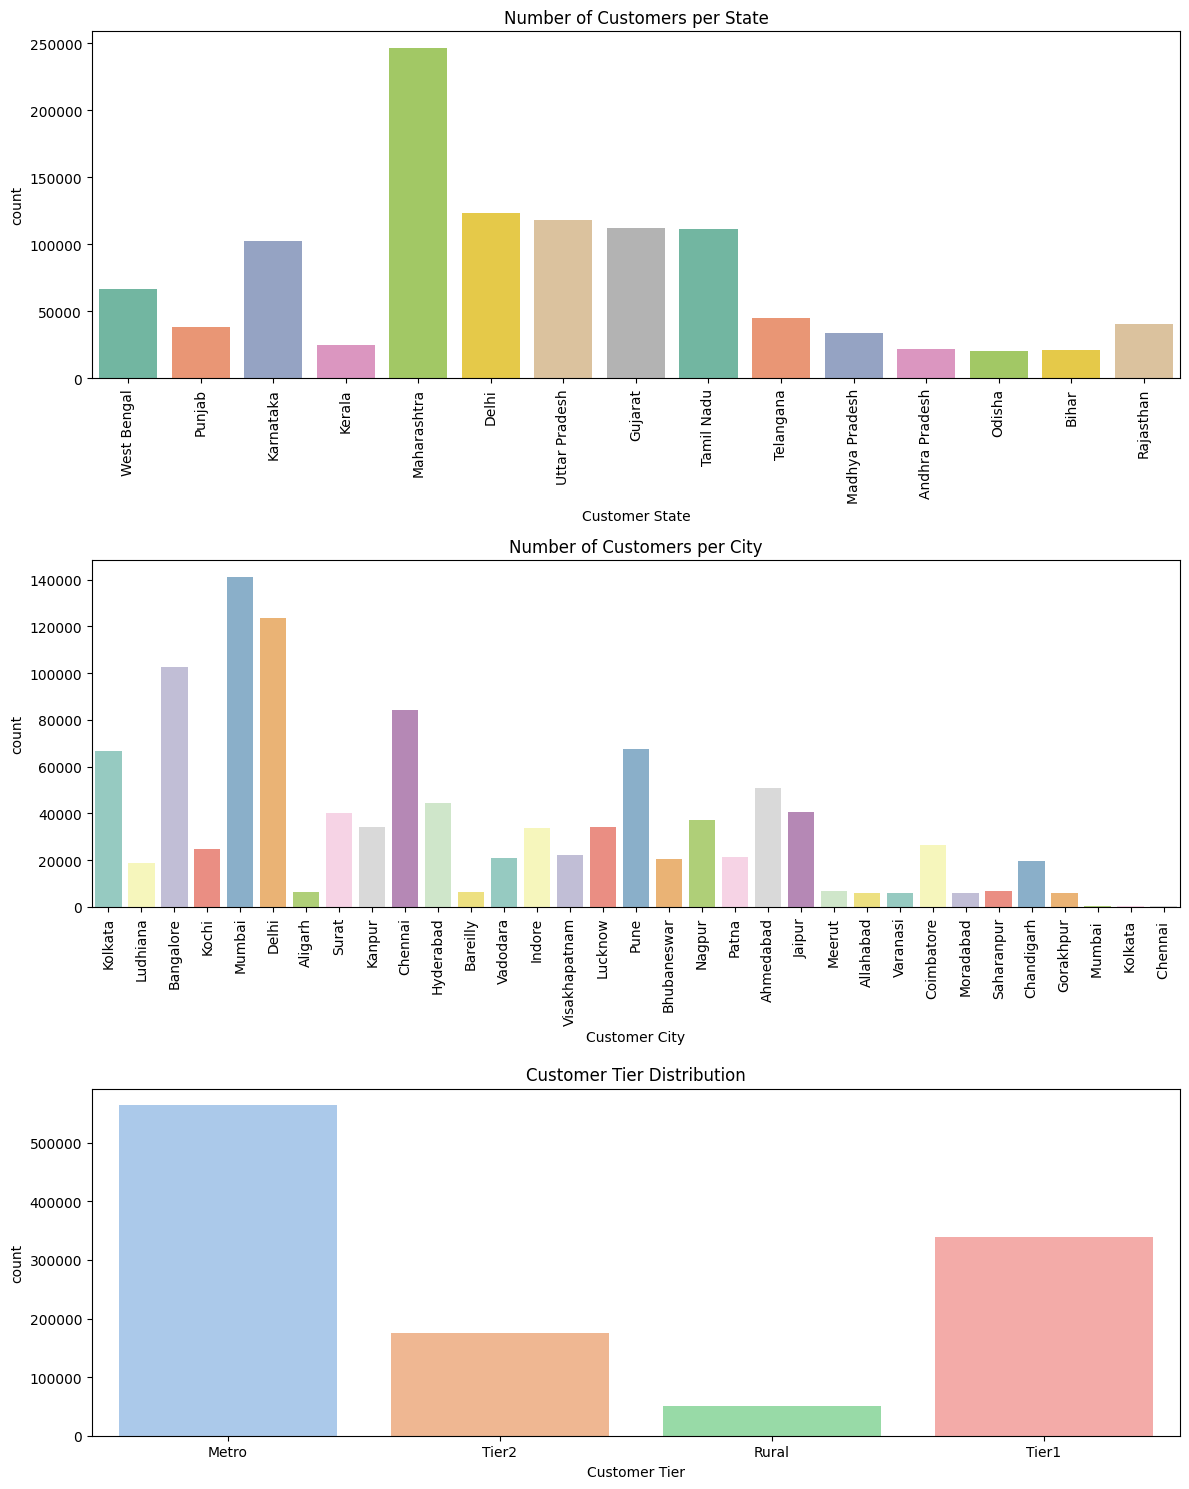

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))  
sns.countplot(data=df, x='Customer State', ax=axes[0], palette="Set2")
axes[0].set_title("Number of Customers per State")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='Customer City', ax=axes[1], palette="Set3")
axes[1].set_title("Number of Customers per City")
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='Customer Tier', ax=axes[2], palette="pastel")
axes[2].set_title("Customer Tier Distribution")

plt.tight_layout()
plt.show()
